In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


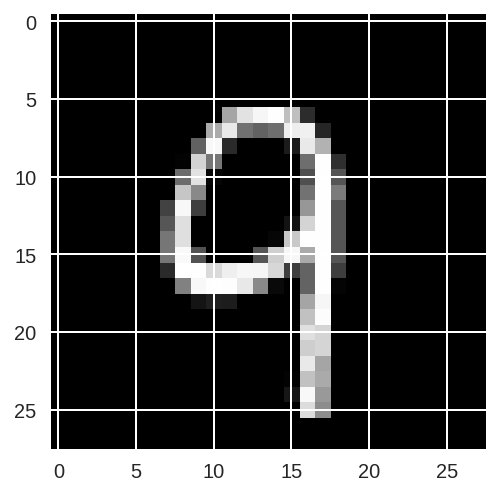

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');


In [0]:
from torch import nn

In [17]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),nn.ReLU(),nn.Linear(hidden_sizes[0],hidden_sizes[1]),nn.ReLU(),nn.Linear(hidden_sizes[1],output_size),nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


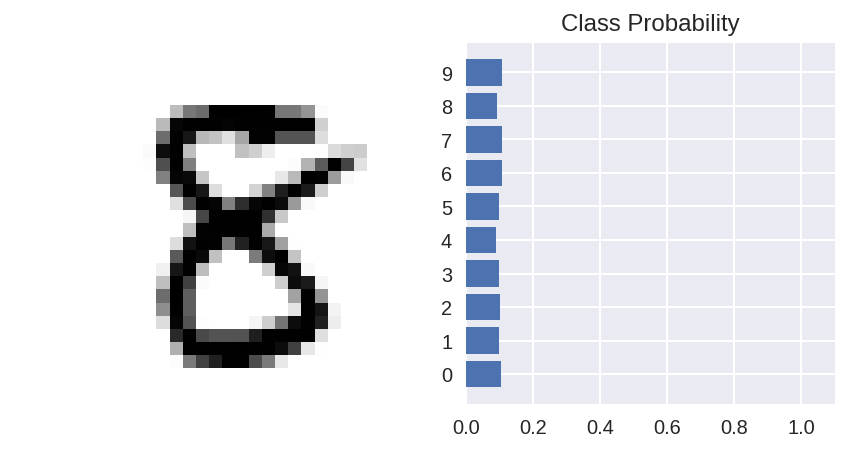

In [18]:
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [19]:
print(model[0])

Linear(in_features=784, out_features=128, bias=True)


In [21]:
print(model[0].weight)
print(model[0].bias)


Parameter containing:
tensor([[ 0.0103, -0.0340,  0.0348,  ...,  0.0072,  0.0028,  0.0143],
        [-0.0015,  0.0118,  0.0178,  ...,  0.0252,  0.0004,  0.0229],
        [-0.0035,  0.0350, -0.0055,  ...,  0.0028,  0.0229, -0.0012],
        ...,
        [-0.0219, -0.0288, -0.0142,  ..., -0.0099, -0.0248, -0.0116],
        [-0.0143,  0.0058,  0.0300,  ...,  0.0001,  0.0275, -0.0072],
        [-0.0324, -0.0147, -0.0313,  ...,  0.0163, -0.0334, -0.0320]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0152, -0.0173, -0.0353, -0.0268,  0.0081,  0.0236, -0.0077,  0.0085,
        -0.0053, -0.0319, -0.0049, -0.0094,  0.0203, -0.0043, -0.0153, -0.0217,
        -0.0241, -0.0040, -0.0297,  0.0186, -0.0169,  0.0329,  0.0174,  0.0349,
         0.0067, -0.0301,  0.0357, -0.0345, -0.0046,  0.0287, -0.0038,  0.0001,
        -0.0182,  0.0145,  0.0062,  0.0239, -0.0218,  0.0169,  0.0159, -0.0025,
         0.0339, -0.0241, -0.0246,  0.0318, -0.0087,  0.0275, -0.0292,  0.0076,
         0.0113